<a href="https://colab.research.google.com/github/shhh-33/sesac-python/blob/shhh/%ED%86%B5%EA%B3%84%EB%B6%84%EC%84%9D%EC%8B%9C%EA%B0%81%ED%99%94_%EC%9D%91%EC%9A%A9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [16]:
path = '/content/sample_data/train_titanic.csv'
df = pd.read_csv(path)
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


# 1. 주어진 자료의 인원, 생존자, 사망자는 몇 명인가?

In [21]:
df['Survived'].value_counts()  #1생존자 , 0 사망자

0    549
1    342
Name: Survived, dtype: int64

In [38]:
#인원
count = df['PassengerId'].count()
#생존자와 사망자
sur_data = df['Survived']
print(type(sur_data))
svc = sur_data.value_counts()
#0은 사망자 1은 생존자
print(type(svc)) #series는 인덱스와 value가 있다.
sur_data.count()
print(f"인원 : {sur_data.count()}, 사망자수 : {svc.values[0]}, 생존자 수 : {svc.values[1]}")

<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
인원 : 891, 사망자수 : 549, 생존자 수 : 342



2. 생존자와 사망자를 Pie 그래프로 나타내고 생존자와 사망자의 퍼센트를 소수점 2자리까지 나타내시오.


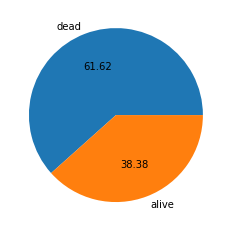

In [42]:
labels=["dead" , "alive"]
plt.pie(svc, labels=labels, autopct="%.2f" )
plt.show()

3. 결측데이터가 있는 컬럼들을 조사하시오.

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [33]:
df['Age'].isnull().value_counts()

False    714
True     177
Name: Age, dtype: int64

In [34]:
df['Cabin'].isnull().value_counts()

True     687
False    204
Name: Cabin, dtype: int64

In [36]:
df['Embarked'].isnull().value_counts()

False    889
True       2
Name: Embarked, dtype: int64

4. Pclass의 종류별로 분포를 Pie 그래프로 나타내시오.

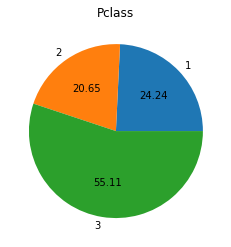

In [48]:
 #df['Pclass'] 
dvc = df.Pclass.value_counts().sort_index()
plt.pie(dvc.values , labels=['1','2','3'] ,autopct="%.2f")
plt.title("Pclass")
plt.show()

5. Pclass의 종류별로 생존자와 사망자를 하나의 막대그래프로 나타내시오.(아래:생존자, 위:사망자)

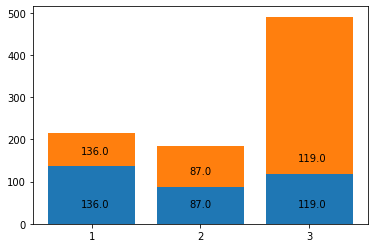

In [54]:
pdata = df.Pclass
cn = len(pdata.unique())
pc_alive_arr = np.zeros(cn)
pc_dead_arr = np.zeros(cn)

for index in range(len(pdata)):
  pi = pdata[index]-1 # Pclass는 1,2,3인데 이를 0,1,2로 변환 
  if sur_data[index]==0: #죽은 승객일 때
    pc_dead_arr[pi] +=1
  else: #생존
    pc_alive_arr[pi] +=1

pc_alive_arr, pc_dead_arr  #클래스1,2,3 별로 살아있는 ... (array([136.,  87., 119.]), array([ 80.,  97., 372.]))

labels=['1','2','3']
plt.bar(labels,pc_alive_arr)
plt.bar(labels,pc_dead_arr , bottom=pc_alive_arr)

for i in range(cn):
  plt.annotate(str(pc_alive_arr[i]) ,(-0.1+i,40))
  plt.annotate(str(pc_alive_arr[i]) ,(-0.1+i,pc_alive_arr[i]+30))


plt.show()



6. Name 컬럼에 탑승자를 부르는 호칭을 Mr, Mrs, Miss, Master, Dr, ETC로 나누어 분포를 파이 그래프로 나타내시오.

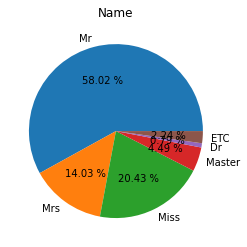

In [67]:
df.Name
names_values=['Mr', 'Mrs', 'Miss', 'Master', 'Dr', 'ETC']
#names_values 중에 몇 번째 것인지 판별하는 함수
def get_name_index(name):
  first, second= name.split(',')#,를 기준으로 앞뒤로 분리시켜서 뒤쪽 데이터만 사용
  foos = second.split('.' )#뒤의 데이터 중에서도 .을 기준으로 분리, 그런데 .이 있지 않은 것도 있어서 컬렉션을 받고
  tn = foos[0].replace(' ','') #공백을 없앤다.
  for index, nv in enumerate(names_values): #names_values
    if nv == tn:
      return index  
  return 5

#ni=get_name_index(df.Name[1])  잘 작동하는지 확인
#print(f"{df.Name[1]} : {names_values[ni]}")

n_cnts = np.zeros(6) #names_values 길이만큼을 원소값0 array로 만들기
for i, name in enumerate(df.Name):
  ni = get_name_index(name)
  n_cnts[ni] +=1
#print(n_cnts)

plt.pie(n_cnts, labels=names_values, autopct="%.2f %%")
plt.title("Name")
plt.show()

7. 앞에서 구분한 호칭에 따른 생존자와 사망자를 하나의 막대그래프로 나타내시오.(아래:생존자, 위:사망자)


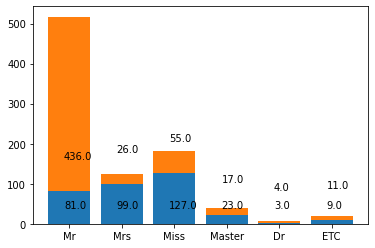

In [77]:
pn_alive_arr = np.zeros(6)
pn_dead_arr = np.zeros(6)
for i,name in enumerate(df.Name):
  ni = get_name_index(name)
  if sur_data[i]==0:
    pn_dead_arr[ni]+=1
  else:
    pn_alive_arr[ni]+=1
plt.bar(names_values, pn_alive_arr)
plt.bar(names_values, pn_dead_arr, bottom = pn_alive_arr)
for i in range(6):
  plt.annotate(str(pn_alive_arr[i]),(-0.1+i,40))
  if pn_alive_arr[i]<40:
    plt.annotate(str(pn_dead_arr[i]),(-0.1+i, pn_alive_arr[i]+80))
  else:
    plt.annotate(str(pn_dead_arr[i]),(-0.1+i, pn_alive_arr[i]+80))
plt.show()


8. 성별로 분포를 파이 그래프로 나타내시오.

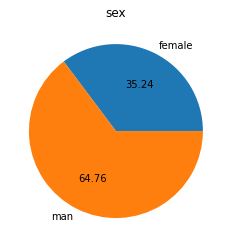

In [81]:
dvc = df.Sex.value_counts().sort_index()
plt.pie(dvc.values , labels=['female','man'] ,autopct="%.2f")
plt.title("sex")
plt.show()  #0남자 

9. 성별에 따른 생존자와 사망자를 하나의 막대그래프로 나타내시오.(아래:생존자, 위:사망자)

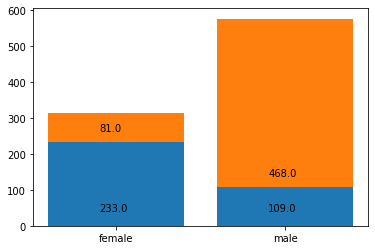

In [91]:
sdata = df.Sex
sn = len(sdata.unique())
ps_alive_arr = np.zeros(sn)
ps_dead_arr = np.zeros(sn)

for index in range(len(sdata)):
  if sdata[index] =='female':
    si =0
  else:
    si =1
  if sur_data[index] ==0: #죽은 승객일때
    ps_dead_arr[si]+=1
  else:
    ps_alive_arr[si]+=1 

labels=['female','male']
plt.bar(labels,ps_alive_arr)
plt.bar(labels,ps_dead_arr , bottom=ps_alive_arr)

for i in range(sn):
  plt.annotate(str(ps_alive_arr[i]) ,(-0.1+i,40))
  plt.annotate(str(ps_dead_arr[i]) ,(-0.1+i,ps_alive_arr[i]+30))


plt.show()



10. 나이를 5살 범위로 17단계로(0~5, 5~10,...,80~85)로 나누어 분포를 조사하여 파이 그래프로 나타내시오.(결측값은 평균나이로 처리하시오.)

In [95]:
mv = df.Age.mean() #평균
ad = df.Age.fillna(mv) #결측치를 수정
ad.isnull().value_counts() #확인

False    891
Name: Age, dtype: int64

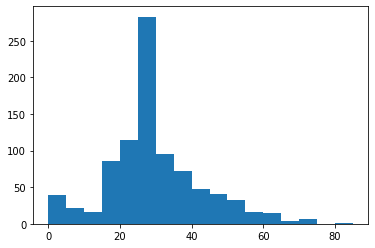

array([ 40.,  22.,  16.,  86., 114., 283.,  95.,  72.,  48.,  41.,  32.,
        16.,  15.,   4.,   6.,   0.,   1.])

In [101]:
n, bins, patches = plt.hist(ad,bins =[0,5,10,15,20,25,30,35,40,45,50,55,60,65,70,75,80,85])
plt.show()
n

In [102]:
age_values = np.zeros(17)
for i, age in enumerate(ad):
  ai =  age//5
  ai = int(ai)
  age_values[ai] +=1
age_values

array([ 40.,  22.,  16.,  86., 114., 283.,  95.,  72.,  48.,  41.,  32.,
        16.,  15.,   4.,   6.,   0.,   1.])

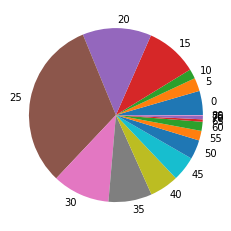

In [103]:
plt.pie(age_values ,labels=['0','5','10','15','20','25','30','35','40','45','50','55','60','65','70','75','80'])
plt.show()

11. 나이를 구분한 단계에 따른 생존자와 사망자를 하나의 막대그래프로 나타내시오.(아래:생존자, 위:사망자)

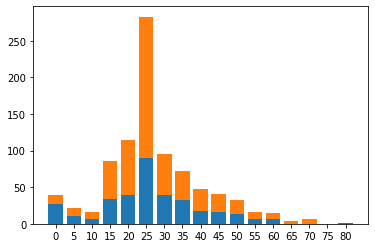

00  ~ 05:  040
05  ~ 10:  022
10  ~ 15:  016
15  ~ 20:  086
20  ~ 25:  114
25  ~ 30:  283
30  ~ 35:  095
35  ~ 40:  072
40  ~ 45:  048
45  ~ 50:  041
50  ~ 55:  032
55  ~ 60:  016
60  ~ 65:  015
65  ~ 70:  004
70  ~ 75:  006
75  ~ 80:  000
80  ~ 85:  001


In [105]:
ps_alive_arr = np.zeros(17)
ps_dead_arr = np.zeros(17)
for index in range(len(ad)):
  ai = ad[index]//5
  ai = int(ai)
  
  if sur_data[index]==0: #죽은 승객일 때
    ps_dead_arr[ai]+=1
  else: #생존 승객일 때
    ps_alive_arr[ai]+=1

labels=['0','5','10','15','20','25','30','35','40','45','50','55','60','65','70','75','80']
plt.bar(labels,ps_alive_arr)
plt.bar(labels,ps_dead_arr,bottom=ps_alive_arr)
plt.show()
for i in range(17):
  print(f"{i*5:02d}  ~ {(i+1)*5:-02d}:  {age_values[i]:03.0f}")


plt.show()


12. SibSp 컬럼의 값의 종류에 따른 분포를 조사하여 파이 그래프로 나타내시오.

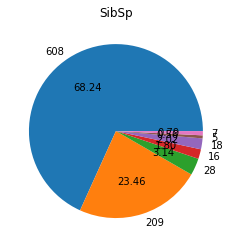

In [107]:
svc = df.SibSp.value_counts().sort_index()
plt.pie(svc.values , labels=svc, autopct="%.2f")
plt.title("SibSp")
plt.show()

13. 값에 따른 생존자와 사망자를 하나의 막대그래프로 나타내시오.(아래:생존자, 위:사망자)

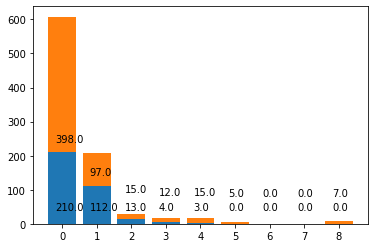

In [109]:
sdata = df.SibSp
sn = 9 #형제 자매 수를 인덱스로 사용하기 위해서 0~8개까지 9개를 사용 
sc_alive_arr = np.zeros(sn)
sc_dead_arr = np.zeros(sn)

for index in range(len(sdata)):
  si = sdata[index] #형제 자매수를 얻어온다.
  if sur_data[index] ==0: #죽은 승객일때
    sc_dead_arr[si]+=1
  else:
    sc_alive_arr[si]+=1 

labels=[str(i) for i in range(9)]
plt.bar(labels,sc_alive_arr)
plt.bar(labels,sc_dead_arr , bottom=sc_alive_arr)

for i in range(sn):
  plt.annotate(str(sc_alive_arr[i]) ,(-0.2+i,40))
  if sc_alive_arr[i] <40:
     plt.annotate(str(sc_dead_arr[i]) ,(-0.2+i,sc_alive_arr[i]+80))
  else:
    plt.annotate(str(sc_dead_arr[i]) ,(-0.2+i,sc_alive_arr[i]+30))


plt.show()



14. Parch 컬럼의 값의 종류에 따른 분포를 조사하여 파이 그래프로 나타내시오.


15. 값에 따른 생존자와 사망자를 하나의 막대그래프로 나타내시오.(아래:생존자, 위:사망자)


16. 승선한 항구(Embarked 컬럼)에 따른 분포를 조사하여 파이 그래프로 나타내시오.(결측값은 'N'으로 마킹하시오.)

17. 값에 따른 생존자와 사망자를 하나의 막대그래프로 나타내시오.(아래:생존자, 위:사망자)

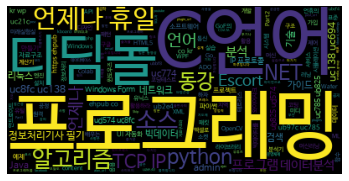

{'62205097ca8ae': 0.07142857142857142,
 'ADO': 0.14285714285714285,
 'API': 0.14285714285714285,
 'CDATA': 0.07142857142857142,
 'Colab': 0.14285714285714285,
 'C언어': 1.0,
 'Escort': 0.35714285714285715,
 'Go': 0.14285714285714285,
 'GoF의': 0.14285714285714285,
 'HTML5': 0.14285714285714285,
 'IP 프로토콜': 0.2857142857142857,
 'Java': 0.2857142857142857,
 'ML': 0.14285714285714285,
 'MS': 0.07142857142857142,
 'MSSQL과': 0.07142857142857142,
 'NET': 0.42857142857142855,
 'OpenCV': 0.14285714285714285,
 'Part1': 0.07142857142857142,
 'Part2': 0.14285714285714285,
 'SQL과': 0.07142857142857142,
 'Skip': 0.07142857142857142,
 'TCP IP': 0.42857142857142855,
 'UI 자동화': 0.21428571428571427,
 'WPF': 0.14285714285714285,
 'Wafer': 0.14285714285714285,
 'Windows': 0.14285714285714285,
 'Windows Form': 0.2857142857142857,
 'W접근성': 0.07142857142857142,
 'XML': 0.14285714285714285,
 'admin': 0.2857142857142857,
 'ajax': 0.07142857142857142,
 'alax_url': 0.07142857142857142,
 'co kr': 0.2142857142857142

In [79]:
from bs4 import BeautifulSoup
url = 'https://ehpub.co.kr'
response = urllib.request.urlopen(url) #웹 서버에 요청
res = response.read().decode('utf-8')
bre = BeautifulSoup(res,'html.parser')


wc = WordCloud(font_path = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf')
wc.generate(bre.body.text)
plt.figure()
plt.imshow(wc)
plt.axis('off')
plt.show()
wc.words_